# Cat and Dog Classification

In [1]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 6.18 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (25001/25001), done.


## VGG 16 Architecture
![img](src/arch.png)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
test_data_dir = 'dog-cat-full-dataset/data/test'
train_data_dir ='dog-cat-full-dataset/data/train'

In [4]:
img_width = 32
img_height = 32
batch_size = 20

In [5]:
datagen = ImageDataGenerator(rescale=1/255.0)

In [6]:
train_generator = datagen.flow_from_directory(directory=train_data_dir, target_size=(img_width,img_height), classes=['dogs','cats'], class_mode='binary', batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [7]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [8]:
validation_generator=datagen.flow_from_directory(directory=test_data_dir, target_size=(img_width,img_height), classes=['dogs','cats'], class_mode='binary', batch_size=batch_size)

Found 5000 images belonging to 2 classes.


## Build CNN Base Model

In [9]:
model= Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=validation_generator, validation_steps=len(validation_generator),verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1000/1000 [==============================] - 39s 39ms/step - loss: 0.6954 - accuracy: 0.5118 - val_loss: 0.6905 - val_accuracy: 0.5226
Epoch 2/5
1000/1000 [==============================] - 39s 39ms/step - loss: 0.6928 - accuracy: 0.5099 - val_loss: 0.6936 - val_accuracy: 0.5006
Epoch 3/5
1000/1000 [==============================] - 39s 39ms/step - loss: 0.6929 - accuracy: 0.5042 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 39s 39ms/step - loss: 0.6934 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5004
Epoch 5/5
1000/1000 [==============================] - 39s 39ms/step - loss: 0.6930 - accuracy: 0.5024 - val_loss: 0.6938 - val_accuracy: 0.5000


In [12]:
import matplotlib.pyplot as plt

In [13]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()

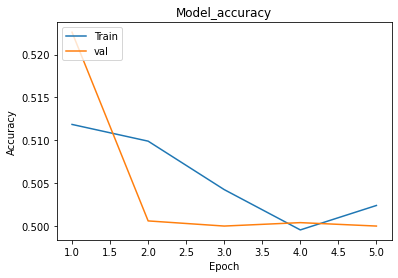

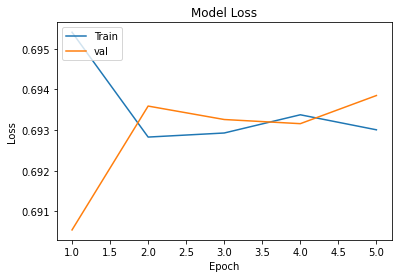

In [14]:
plot_learningCurve(history,5)

## Implement first 3 blocks of VGG 16

In [15]:
model= Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=256, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=validation_generator, validation_steps=len(validation_generator),verbose=1)

Epoch 1/5
1000/1000 [==============================] - 39s 39ms/step - loss: 0.6312 - accuracy: 0.6374 - val_loss: 0.5470 - val_accuracy: 0.7246
Epoch 2/5
1000/1000 [==============================] - 40s 40ms/step - loss: 0.5315 - accuracy: 0.7356 - val_loss: 0.5011 - val_accuracy: 0.7516
Epoch 3/5
1000/1000 [==============================] - 39s 39ms/step - loss: 0.4705 - accuracy: 0.7770 - val_loss: 0.5356 - val_accuracy: 0.7324
Epoch 4/5
1000/1000 [==============================] - 39s 39ms/step - loss: 0.4295 - accuracy: 0.8025 - val_loss: 0.4391 - val_accuracy: 0.7938
Epoch 5/5
1000/1000 [==============================] - 39s 39ms/step - loss: 0.3826 - accuracy: 0.8251 - val_loss: 0.4611 - val_accuracy: 0.7896


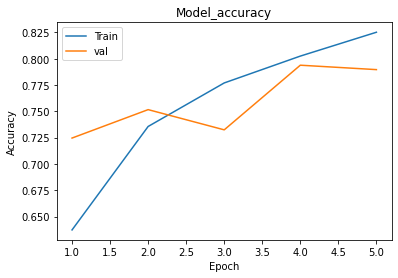

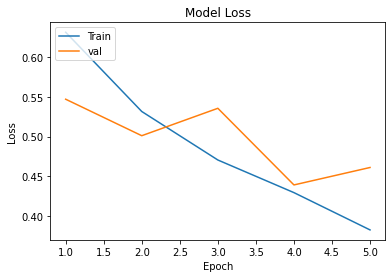

In [18]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
plot_learningCurve(history,5)

## Batch Normalization and drop out layer

In [19]:
model= Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [10]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=validation_generator, validation_steps=len(validation_generator),verbose=1)

Epoch 1/10
1000/1000 [==============================] - 40s 40ms/step - loss: 0.4861 - accuracy: 0.7677 - val_loss: 0.4806 - val_accuracy: 0.7824
Epoch 2/10
1000/1000 [==============================] - 40s 40ms/step - loss: 0.4667 - accuracy: 0.7791 - val_loss: 0.4469 - val_accuracy: 0.7878
Epoch 3/10
1000/1000 [==============================] - 39s 39ms/step - loss: 0.4530 - accuracy: 0.7876 - val_loss: 0.5060 - val_accuracy: 0.7498
Epoch 4/10
1000/1000 [==============================] - 40s 40ms/step - loss: 0.4437 - accuracy: 0.7920 - val_loss: 0.5284 - val_accuracy: 0.7608
Epoch 5/10
1000/1000 [==============================] - 39s 39ms/step - loss: 0.4279 - accuracy: 0.8042 - val_loss: 0.4371 - val_accuracy: 0.7874
Epoch 6/10
1000/1000 [==============================] - 40s 40ms/step - loss: 0.4160 - accuracy: 0.8095 - val_loss: 0.4058 - val_accuracy: 0.8100
Epoch 7/10
1000/1000 [==============================] - 39s 39ms/step - loss: 0.3972 - accuracy: 0.8205 - val_loss: 0.3891 -

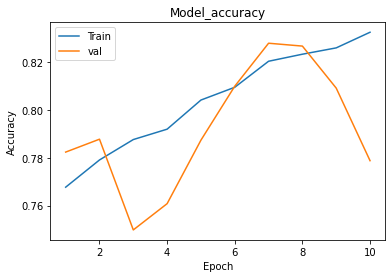

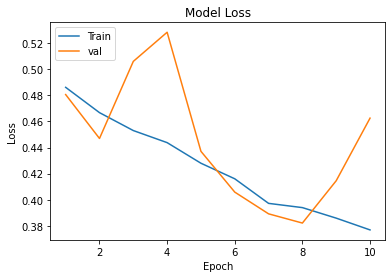

In [25]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
plot_learningCurve(history,10)

# Full VGG 16

In [26]:
model= Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height,3)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=256, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=256, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=512, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=512, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=512, kernel_size=(3,3),activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(4096,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4096,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4096,activation='relu',kernel_initializer='he_uniform'))


model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 256)        

In [29]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=validation_generator, validation_steps=len(validation_generator),verbose=1)

Epoch 1/10
1000/1000 [==============================] - 66s 66ms/step - loss: 0.6944 - accuracy: 0.5160 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
1000/1000 [==============================] - 66s 66ms/step - loss: 0.6835 - accuracy: 0.5484 - val_loss: 0.6900 - val_accuracy: 0.5390
Epoch 3/10
1000/1000 [==============================] - 66s 66ms/step - loss: 0.6388 - accuracy: 0.6203 - val_loss: 0.6062 - val_accuracy: 0.6498
Epoch 4/10
1000/1000 [==============================] - 67s 67ms/step - loss: 0.5373 - accuracy: 0.7300 - val_loss: 0.5083 - val_accuracy: 0.7566
Epoch 5/10
1000/1000 [==============================] - 67s 67ms/step - loss: 0.4649 - accuracy: 0.7812 - val_loss: 0.4455 - val_accuracy: 0.7912
Epoch 6/10
1000/1000 [==============================] - 67s 67ms/step - loss: 0.4145 - accuracy: 0.8148 - val_loss: 0.4940 - val_accuracy: 0.7674
Epoch 7/10
1000/1000 [==============================] - 67s 67ms/step - loss: 0.3722 - accuracy: 0.8343 - val_loss: 0.4525 -

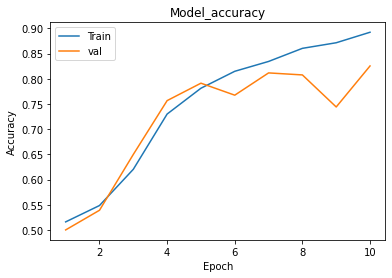

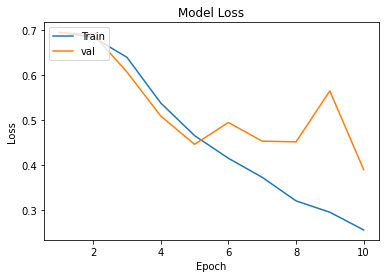

In [31]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
plot_learningCurve(history,10)

In [44]:
model.save('VGG16_cats_dogs.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: VGG16_cats_dogs.model/assets


In [86]:
predictions = model.predict(validation_generator)

In [89]:
np.round(predictions)

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [76]:
validation_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [90]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

In [91]:
mat=confusion_matrix(np.round(predictions), validation_generator.classes)
mat

array([[1405, 1370],
       [1095, 1130]])

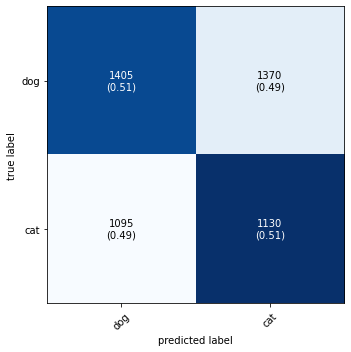

In [94]:
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(5,5),class_names=['dog','cat'], show_normed=True)
plt.tight_layout()
fig.savefig('cm.png')

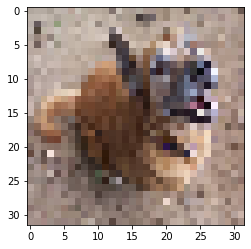

In [123]:
plt.imshow(validation_generator[0][0][1])

In [119]:
pred=model.predict(validation_generator[0][0])

In [121]:
pred

array([[9.44406629e-01],
       [1.07304506e-01],
       [7.29985461e-02],
       [1.42538090e-06],
       [7.51892803e-03],
       [6.81935430e-01],
       [9.33121517e-02],
       [8.28664005e-03],
       [7.29375124e-01],
       [2.57492661e-02],
       [3.12117208e-02],
       [9.10907507e-01],
       [3.47748369e-01],
       [8.78719807e-01],
       [2.10177066e-04],
       [3.41814682e-02],
       [9.59490895e-01],
       [6.52395368e-01],
       [2.16794744e-01],
       [7.79984117e-01]], dtype=float32)